In [2]:
#Import Statements
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import chardet

sns.set() # Setting seaborn as default style
sns.set_theme()

# declare global helpers
condition_values = ['0ms','10ms','400ms','10ms echo','400ms echo']
groupnames = [0,1,2,3,4]
browsernames = ["MSIE", "Firefox", "Safari", "Chrome", "Opera"]

In [3]:
# Columns below this comment are as follows:
# 1. Time results were received.
# 2. MD5 hash of participant's IP address.
# 3. Controller name.
# 4. Item number.
# 5. Element number.
# 6. Type.
# 7. Group.
# 8. Field name.
# 9. Field value.
df = pd.read_csv('results_feedback_form.txt',
                 sep = ',',
                 comment='#', 
                 header=None,
                 names = ['time','hash','controller','item','element', 'type', 'group','field_name', 'value'],
                engine = 'python')

In [4]:
df.info()
print([*df])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        463 non-null    int64  
 1   hash        463 non-null    object 
 2   controller  463 non-null    object 
 3   item        463 non-null    int64  
 4   element     463 non-null    int64  
 5   type        463 non-null    object 
 6   group       0 non-null      float64
 7   field_name  463 non-null    object 
 8   value       284 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 32.7+ KB
['time', 'hash', 'controller', 'item', 'element', 'type', 'group', 'field_name', 'value']


In [5]:
df.tail(50)

,time,hash,controller,item,element,type,group,field_name,value
413,1619606109,58d50698a3ceddb703d5371ffd0027d4,Form,1,0,intro,NaN,length,nein
414,1619606109,58d50698a3ceddb703d5371ffd0027d4,Form,1,0,intro,NaN,breaks,nein
415,1619606109,58d50698a3ceddb703d5371ffd0027d4,Form,1,0,intro,NaN,audioplayback,nein
416,1619606109,58d50698a3ceddb703d5371ffd0027d4,Form,1,0,intro,NaN,external_factor,nein
417,1619606109,58d50698a3ceddb703d5371ffd0027d4,Form,1,0,intro,NaN,_REACTION_TIME_,296780
418,1619606125,ed31f1f2fe430d1021c8578ce6a4934c,Form,1,0,intro,NaN,fname,91
419,1619606125,ed31f1f2fe430d1021c8578ce6a4934c,Form,1,0,intro,NaN,group,1
420,1619606125,ed31f1f2fe430d1021c8578ce6a4934c,Form,1,0,intro,NaN,load_time,1
421,1619606125,ed31f1f2fe430d1021c8578ce6a4934c,Form,1,0,intro,NaN,audioproblem,NaN
422,1619606125,ed31f1f2fe430d1021c8578ce6a4934c,Form,1,0,intro,NaN,external_factor_description,NaN


In [6]:
#display all the genders
list(df[df['field_name'] == 'comment']['value'])

[nan,
 nan,
 nan,
 nan,
 nan,
 'checkpoints einbauen?',
 nan,
 nan,
 nan,
 nan,
 'unklar was Verzerrung wirklich bedeutet -> nur die starke Dopplung oder auch weniger auffällige "Echos"? Oder war das ein Tonqualitätsmangel...%0AUnklar wo ich hingucken soll. Muss ic auf das Kreuz/Video gucken oder daf ich die Bilder bei der Entschedng anschauen.',
 nan,
 nan,
 nan,
 nan,
 'Der Begriff "Verzerrungen" in Bezug auf die kurzen Clips war mir nicht ganz klar. evtl. wäre eine Vordefinition hilfreich gewesen ',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Die Bilder unterschieden sich teilweise stark im Zeichenstil',
 'Einige der Instruktions-Texte waren oben deutlich abgeschnitten.%0ADas könnte vermutlich am meinem Bildschirmformat liegen (21:9)',
 nan,
 nan]

In [7]:
list(df[df['field_name'] == 'audioproblem']['value'])

[nan,
 'abgelenkt%2C mit console gecheated',
 nan,
 'Kinder und Telefon',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Es hat geklingelt%2C weil mein Burger geliefert wurde.',
 'dauerhaftes rauschen im Hintergrund.%0ADies nahm ich zuerst als Störgeräusch / Verzerrung wahr.%0ADas wird die Ergebnisse des Experiments verfälschen. Besonders wenn es mehreren Teilnehmern so geht.',
 nan,
 nan,
 nan,
 'Videos laden gar nicht in Safari%2C bei letzten zwei Fragen-Runden laden Videos nicht sofort%2C sondern brauchen einige Minuten (1-2)',
 'Handy%2C Konzentrationsabnahme im Laufe des Experiments',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Erst hatte ich kein Ton%2C dann habe ich es nochmal gestartet und es hat funktioniert.',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Beim ersten Versuch hat die Audiowiedergabe nicht funktioniert. Ein Wechsel des Browsers hat das Problem gelöst.',
 nan]

In [8]:
list(df[df['field_name'] == 'image_clarity']['value'])

[nan,
 'Kasper und Clown%0ARitter und Wikinger',
 nan,
 nan,
 nan,
 'bäcker/koch',
 nan,
 nan,
 'nein',
 nan,
 'Koch - Bäcker (ähnliche Bilder) ',
 nan,
 nan,
 nan,
 nan,
 'Ja bei 2%2C3 hatte ich das Wort vergessen bzw war mir nicht mehr sicher welches Wort es war.',
 nan,
 nan,
 nan,
 nan,
 nan,
 'Der Prinz sah aus wie Robin Hood.',
 'Koch und Bäcker gleichzeitig waren sehr ähnlich',
 nan,
 'Matrose + Kapitän waren anfangs schwer zu unterscheiden',
 'Ja%2C bei Bäcker und Koch (wusste nicht wer wer sein soll)',
 nan,
 nan,
 nan,
 'Kasper ',
 nan,
 nan,
 'nein']

In [9]:
list(df[df['field_name'] == 'display']['value'])

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'nein',
 'Die Filmclips haben oft gestockt. ',
 'siehe oben ',
 nan,
 nan,
 nan,
 nan,
 'Manchmal (1-3 mal) wurden die Worte übersprungen. ',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'An einer Stelle zur Beurteilung der Synchronität von Video und Audio erschien statt der Ja/Nein Antwort Möglichkeit ein Bild mit zwei Figuren.',
 'nein']

In [10]:
list(df[df['field_name'] == 'external_factor_description']['value'])

[nan,
 nan,
 'Eine Meldung meines laptops das ich die Seite nochmal laden solle da sie sehr viel Kapazietät braucht. Ich konnte es leider nicht weg klicken. (als Oberer dünner Balken)',
 nan,
 nan,
 'kinder %0Afrau',
 nan,
 nan,
 'Eine andere Person hat zwischendurch den Raum betreten.',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'Handy',
 nan]

## Breaks

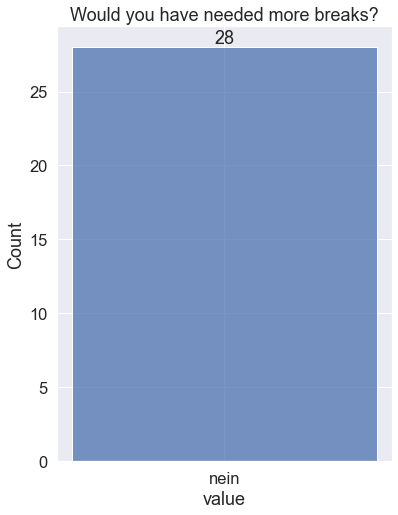

In [13]:
#display all the answers
list(df[df['field_name'] == 'breaks']['value'])
fig = plt.gcf()
fig.set_size_inches(6, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['field_name'] == 'breaks'],x = 'value')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Would you have needed more breaks?')

plt.savefig("gender_dist.png", dpi=300, bbox_inches='tight')

## Length

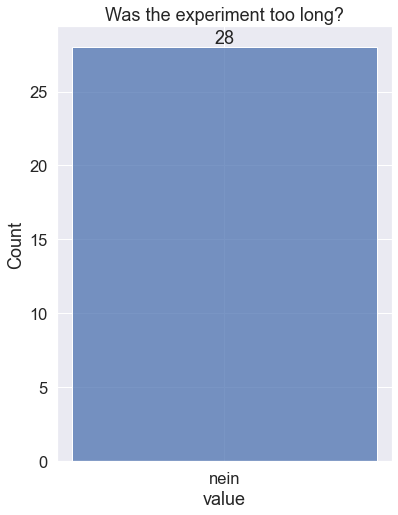

In [14]:
#display all the answers
list(df[df['field_name'] == 'breaks']['value'])
fig = plt.gcf()
fig.set_size_inches(6, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['field_name'] == 'breaks'],x = 'value')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Was the experiment too long?')

plt.savefig("gender_dist.png", dpi=300, bbox_inches='tight')